In [1]:
import os
import numpy as np
import pandas as pd

from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [2]:
df=pd.read_csv("AirPassengers.csv",index_col=0)
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [3]:
idx=pd.to_datetime(df.index).to_period("M")
df.index=idx
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [4]:
df.shape

(144, 1)

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

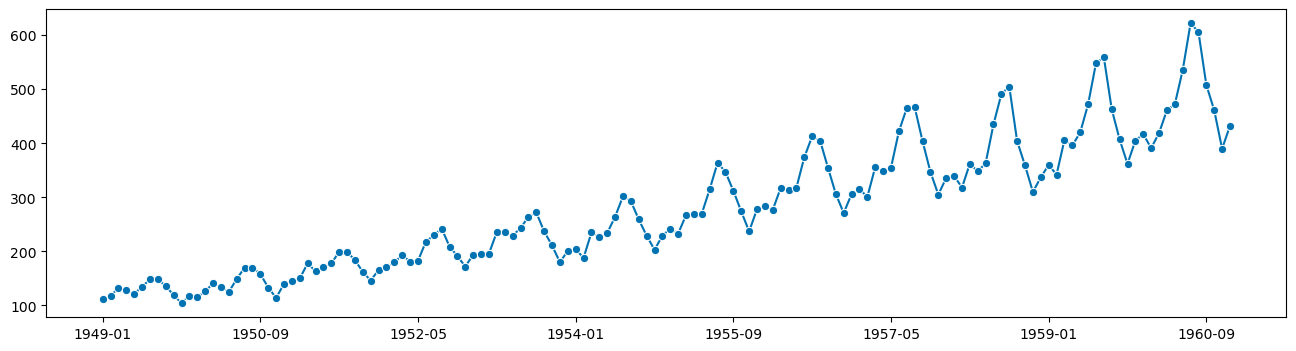

In [5]:
plot_series(df)

In [7]:
y=df['Passengers']
y_train,y_test=temporal_train_test_split(y,test_size=12)
print(y_train.shape,y_test.shape)

(132,) (12,)


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

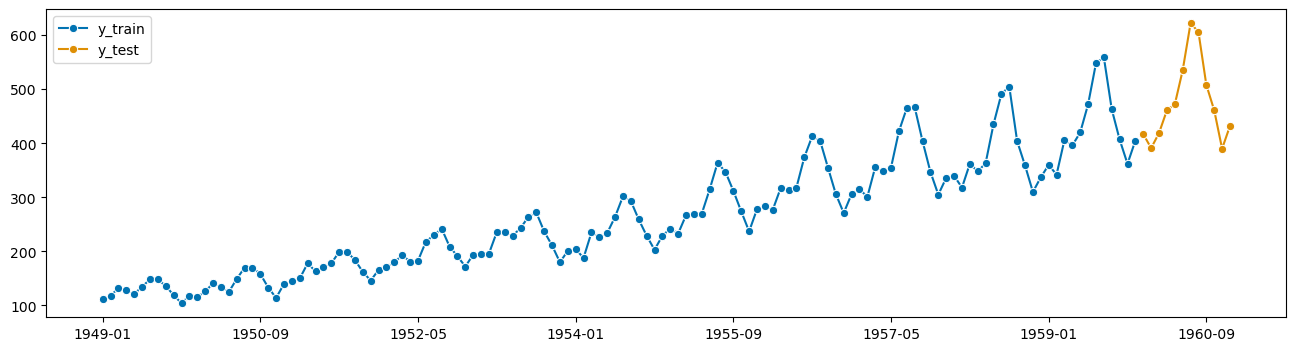

In [8]:
plot_series(y_train,y_test,labels=['y_train','y_test'])

In [8]:
# Specifying Forecasting Horizon

In [9]:
## Exponential Smoothing
import matplotlib.pyplot as plt

In [10]:
fh=ForecastingHorizon(y_test.index,is_relative=False)
fh

ForecastingHorizon(['1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
             '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', is_relative=False)

In [11]:
forecaster=AutoETS(auto=True,sp=12)
forecaster.fit(y_train)
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                  132
Model:                       ETS(MAM)   Log Likelihood                -469.385
Date:                Fri, 17 Nov 2023   AIC                            974.770
Time:                        06:50:02   BIC                           1026.661
Sample:                    01-31-1949   HQIC                           995.856
                         - 12-31-1959   Scale                            0.001
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.9999      0.083     12.008      0.000       0.837       1.163
smoothing_trend      9.999e-05        nan        nan        nan         nan         nan
smoothing_season

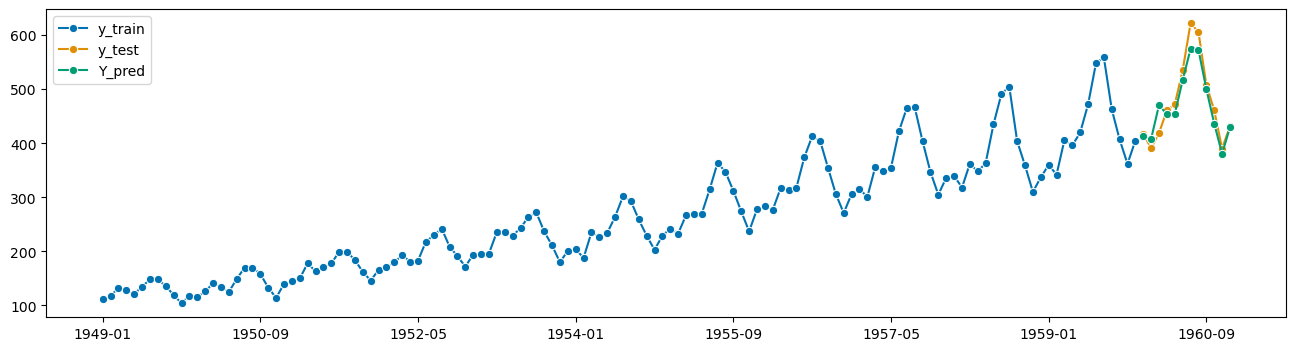

In [12]:
y_pred=forecaster.predict(fh)
plot_series(y_train,y_test,y_pred,labels=['y_train','y_test','Y_pred'])
plt.show()

In [13]:
mean_squared_error(y_test,y_pred,square_root=True)

25.523020872180584